# Image Augmentation

In [1]:
# Image augmentation
import cv2
import random
import os

In [2]:
# Visualization
from matplotlib import pyplot as plt

In [3]:
# Training
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import class_weight

import numpy as np
import model
import time

Using TensorFlow backend.


In [4]:
SIZE = 512

In [5]:
# Creating image generators 
train_datagen = ImageDataGenerator(rescale=1./255)
        
val_datagen = ImageDataGenerator(rescale=1./255)

train_image_generator = train_datagen.flow_from_directory('train_frames', batch_size = 4)

train_mask_generator = train_datagen.flow_from_directory('train_masks', batch_size = 4)

val_image_generator = val_datagen.flow_from_directory('val_frames', batch_size = 4)

val_mask_generator = val_datagen.flow_from_directory('val_masks', batch_size = 4)

train_gen = zip(train_image_generator, train_mask_generator)
val_gen = zip(val_image_generator, val_mask_generator)

Found 51 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [8]:
# Figure out class weights
print(train_image_generator.class_indices)
class_weights = {0: 1.,
                 1: 197.}

print(type(train_gen))

{'.ipynb_checkpoints': 0, 'train': 1}
<class 'zip'>


ValueError: cannot reshape array of size 8 into shape (512,512,3)

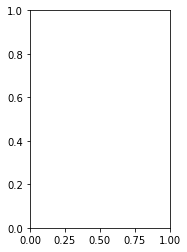

In [7]:
# Check to see if mask is saved correctly for training set
image_batch, mask_batch = next(train_gen)

r = random.randint(0, len(image_batch)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(image_batch[r].reshape(SIZE, SIZE, 3))
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(mask_batch[r], (SIZE, SIZE)), cmap="gray")

In [ ]:
# Check to see if mask is saved correctly for validation set
# image_batch, mask_batch = next(val_gen)

# r = random.randint(0, len(image_batch)-1)

# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(1, 2, 1)
# ax.imshow(image_batch[r].reshape(SIZE, SIZE, 3))
# ax = fig.add_subplot(1, 2, 2)
# ax.imshow(np.reshape(mask_batch[r], (SIZE, SIZE)), cmap="gray")

# Training

In [ ]:
m = model.unet(input_size= (SIZE, SIZE, 3))

In [ ]:
batch_size = 4
NO_OF_TRAINING_IMAGES = len(os.listdir('train_frames/train/'))
NO_OF_VAL_IMAGES = len(os.listdir('val_frames/val/'))

NO_OF_EPOCHS = 30

BATCH_SIZE = batch_size

weights_path = 'weights/weights_512_leakyReLU.h5'

opt = Adam(lr=1E-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

m.compile(loss="binary_crossentropy",
          optimizer=opt,
          metrics=['acc', 'mae'])

checkpoint = ModelCheckpoint(filepath=weights_path, monitor='val_loss', 
                             verbose=1, save_best_only=True, save_weights_only=True)

csv_logger = CSVLogger('./log.out', append=True, separator=';')

earlystopping = EarlyStopping(monitor = 'val_loss', verbose = 1,
                              min_delta = 1e-4, patience = 2, mode = 'auto')

callbacks_list = [checkpoint, csv_logger, earlystopping]



In [ ]:
start_time = time.time()
results = m.fit_generator(train_gen, epochs=NO_OF_EPOCHS, 
                          steps_per_epoch = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_gen, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list,
                          class_weight=class_weights)
time_passed = time.time() - start_time
# print('Ellapsed time: {}'.format(hms_string(time_passed))
m.save('Model_512_LeakyReLU.h5')
print(str(time_passed))

# Evaluate model on test dataset

In [ ]:
# Create testing dataset
test_frame_path = 'test_frames'
test_mask_path  = 'test_masks'

test_gen = data_gen(test_frame_path, test_mask_path, batch_size = 8)

In [ ]:
# Loading test data
image_batch, mask_batch = next(test_gen)

In [ ]:
m.metrics_names

In [ ]:
m.evaluate(x = image_batch,
               y = mask_batch,
               batch_size = 8)

# Making predictions with model

In [ ]:
def predict_one_mask():
    image_batch, mask_batch = next(test_gen)
#     print(type(image_batch))
#     print(type(mask_batch))
    predicted_mask_batch = m.predict(image_batch)
    image = image_batch[0]
#     print(type(predicted_mask_batch))
#     print(type(image))
    print(image.shape)
    predicted_mask = predicted_mask_batch[0].reshape(256, 256)
    plt.imshow(image.squeeze())
    plt.imshow(predicted_mask, alpha=0.9)

In [ ]:
SIZE = (256, 256)
predict_one_mask()

In [ ]:
image_batch, mask_batch = next(test_gen)
pred = m.predict(image_batch)
pred = pred > 0.5

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(mask_batch[0]*255, (256, 256)), cmap='gray')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(pred[0]*255, (256, 256)), cmap="gray")

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(mask_batch[1]*255, (256, 256)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(pred[1]*255, (256, 256)), cmap="gray")

In [ ]:
print(type(train_gen))

In [ ]:
label_map = (train_gen.class_indices)